US Honey Case Study,

PREFACE

In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component of American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America from 1998 to 2016.

#OBJECTIVE#

Visualize how the honey production is changed over the year (1998 - 2016) in US

#QUESTION#

How has honey production yield changed from 1998 to 2016? Over time, what are the major production trends been across the states? Are there any patterns that can be observed between total honey production and value of production every year? How has value of production, which in some sense could be tied to demand, changed every year?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load our dataset

df = pd.read_csv('US_honey_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [4]:
# The dataset provided contains information on the US honey consumption, including the
# average price of honey over the years. We aim to explore and analyze this data to
# identify the trends and patterns in the average honey price and gain insights into its
# fluctuation over time.

In [5]:
# how much data we are having

df.shape

(1115, 9)

In [6]:
# Let's check what exactly is our dataset / get the information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1115 non-null   int64  
 1   state                1115 non-null   object 
 2   colonies_number      1115 non-null   int64  
 3   yield_per_colony     1115 non-null   int64  
 4   production           1115 non-null   int64  
 5   stocks               1115 non-null   int64  
 6   average_price        1115 non-null   float64
 7   value_of_production  1115 non-null   int64  
 8   year                 1115 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 78.5+ KB


In [7]:
# how we can check the datatypes

df.dtypes

Unnamed: 0               int64
state                   object
colonies_number          int64
yield_per_colony         int64
production               int64
stocks                   int64
average_price          float64
value_of_production      int64
year                     int64
dtype: object

In [8]:
# converting the year column into category datatype

#df['year'] = df['year'].astype('category') one way

df.year = df.year.astype('category')

In [9]:
# bonus

help(df.astype)

Help on method astype in module pandas.core.generic:

astype(dtype, copy: 'bool_t' = True, errors: 'IgnoreRaise' = 'raise') -> 'NDFrameT' method of pandas.core.frame.DataFrame instance
    Cast a pandas object to a specified dtype ``dtype``.
    
    Parameters
    ----------
    dtype : data type, or dict of column name -> data type
        Use a numpy.dtype or Python type to cast entire pandas object to
        the same type. Alternatively, use {col: dtype, ...}, where col is a
        column label and dtype is a numpy.dtype or Python type to cast one
        or more of the DataFrame's columns to column-specific types.
    copy : bool, default True
        Return a copy when ``copy=True`` (be very careful setting
        ``copy=False`` as changes to values then may propagate to other
        pandas objects).
    errors : {'raise', 'ignore'}, default 'raise'
        Control raising of exceptions on invalid data for provided dtype.
    
        - ``raise`` : allow exceptions to be rais

In [10]:
#how we can find stats values or quantitative values

df.describe()

,Unnamed: 0,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
count,1115.00000,1115.000000,1115.000000,1.115000e+03,1.115000e+03,1115.000000,1.115000e+03
mean,557.00000,62438.565022,59.743498,2.851268e+06,1.172625e+06,140.623076,5.667412e+06
std,322.01708,92648.175955,19.940500,5.561202e+06,2.049556e+06,107.011544,9.459460e+06
min,0.00000,2000.000000,19.000000,1.200000e+04,9.000000e+03,1.300000,1.060000e+05
25%,278.50000,9000.000000,45.000000,2.460000e+05,1.125000e+05,70.000000,1.008000e+06
50%,557.00000,26000.000000,57.000000,8.280000e+05,3.700000e+05,128.000000,2.281000e+06
75%,835.50000,69000.000000,71.000000,2.700000e+06,1.253500e+06,193.000000,5.704000e+06
max,1114.00000,550000.000000,155.000000,3.906000e+07,1.354500e+07,874.000000,8.385900e+07


In [11]:
# Transpose the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1115.0,5.570000e+02,3.220171e+02,0.0,278.5,557.0,835.5,1114.0
colonies_number,1115.0,6.243857e+04,9.264818e+04,2000.0,9000.0,26000.0,69000.0,550000.0
yield_per_colony,1115.0,5.974350e+01,1.994050e+01,19.0,45.0,57.0,71.0,155.0
production,1115.0,2.851268e+06,5.561202e+06,12000.0,246000.0,828000.0,2700000.0,39060000.0
stocks,1115.0,1.172625e+06,2.049556e+06,9000.0,112500.0,370000.0,1253500.0,13545000.0
average_price,1115.0,1.406231e+02,1.070115e+02,1.3,70.0,128.0,193.0,874.0
value_of_production,1115.0,5.667412e+06,9.459460e+06,106000.0,1008000.0,2281000.0,5704000.0,83859000.0


# Cleaning Data

In [12]:
#first part null values

df.isnull().sum()

Unnamed: 0             0
state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [13]:
# let's relevancy of columns

df.columns

Index(['Unnamed: 0', 'state', 'colonies_number', 'yield_per_colony',
       'production', 'stocks', 'average_price', 'value_of_production', 'year'],
      dtype='object')

In [14]:
# dropping the unneccessary columns

df = df.drop(columns = ['Unnamed: 0'])

In [15]:
# overview

df.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [16]:
# checking the shape after dropping the columns

df.shape

(1115, 8)

In [17]:
# countries

# evaluate: how many countries we are having?

df['state'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'NewJersey', 'NewMexico', 'NewYork',
       'NorthCarolina', 'NorthDakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'SouthCarolina', 'SouthDakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'WestVirginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [18]:
# No of unique states

df['state'].nunique()

44

In [19]:
# How many years?

df['year']

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
1110    2021
1111    2021
1112    2021
1113    2021
1114    2021
Name: year, Length: 1115, dtype: category
Categories (27, int64): [1995, 1996, 1997, 1998, ..., 2018, 2019, 2020, 2021]

In [20]:
1995-2021


-26

In [21]:
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

In [22]:
# predictions : Most of the features are with this column

In [23]:
# Ques: sort all the production in descending order, store in a variable

df2 = df.sort_values('production', ascending = False)


In [24]:
df2

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
3,California,420000,93,39060000,4687000,60.00,23436000,1995
134,California,450000,83,37350000,12326000,62.00,23157000,1998
581,NorthDakota,390000,90,35100000,8424000,135.00,47385000,2008
622,NorthDakota,450000,77,34650000,7623000,137.00,47471000,2009
458,NorthDakota,370000,91,33670000,8418000,81.00,27273000,2005
...,...,...,...,...,...,...,...,...
769,Kentucky,3000,41,17000,17000,325.00,400000,2013
984,SouthCarolina,16000,48,15000,15000,3.17,2435000,2018
955,Alabama,6000,45,14000,14000,3.72,1004000,2018
835,Alabama,7000,47,13000,13000,383.00,1260000,2015


In [25]:
# Max

df['production'].max()

39060000

In [26]:
df2

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
3,California,420000,93,39060000,4687000,60.00,23436000,1995
134,California,450000,83,37350000,12326000,62.00,23157000,1998
581,NorthDakota,390000,90,35100000,8424000,135.00,47385000,2008
622,NorthDakota,450000,77,34650000,7623000,137.00,47471000,2009
458,NorthDakota,370000,91,33670000,8418000,81.00,27273000,2005
...,...,...,...,...,...,...,...,...
769,Kentucky,3000,41,17000,17000,325.00,400000,2013
984,SouthCarolina,16000,48,15000,15000,3.17,2435000,2018
955,Alabama,6000,45,14000,14000,3.72,1004000,2018
835,Alabama,7000,47,13000,13000,383.00,1260000,2015


In [27]:
# Relationship analysis, how two columns are related each other

corr = df.corr()

<Axes: >

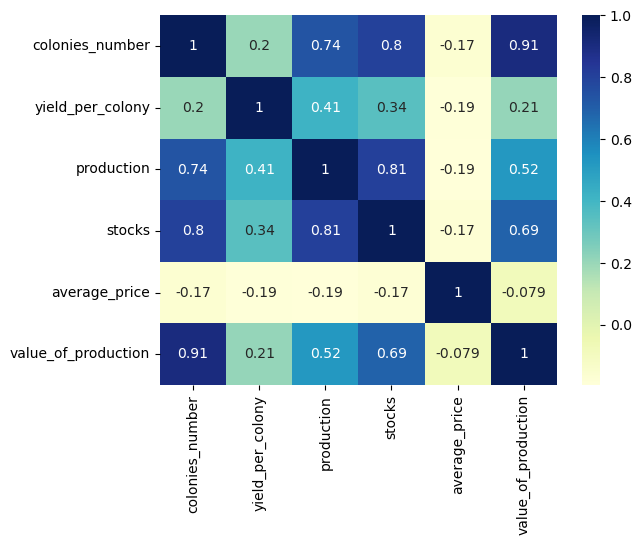

In [28]:
# Heatmap, graphical way to interpret correlation

sns.heatmap(corr, annot= True, cmap= 'YlGnBu')  #YlGnBu = Yellow Green Blue

# Bonus : multiply the corr by 100, to get a easier visualization

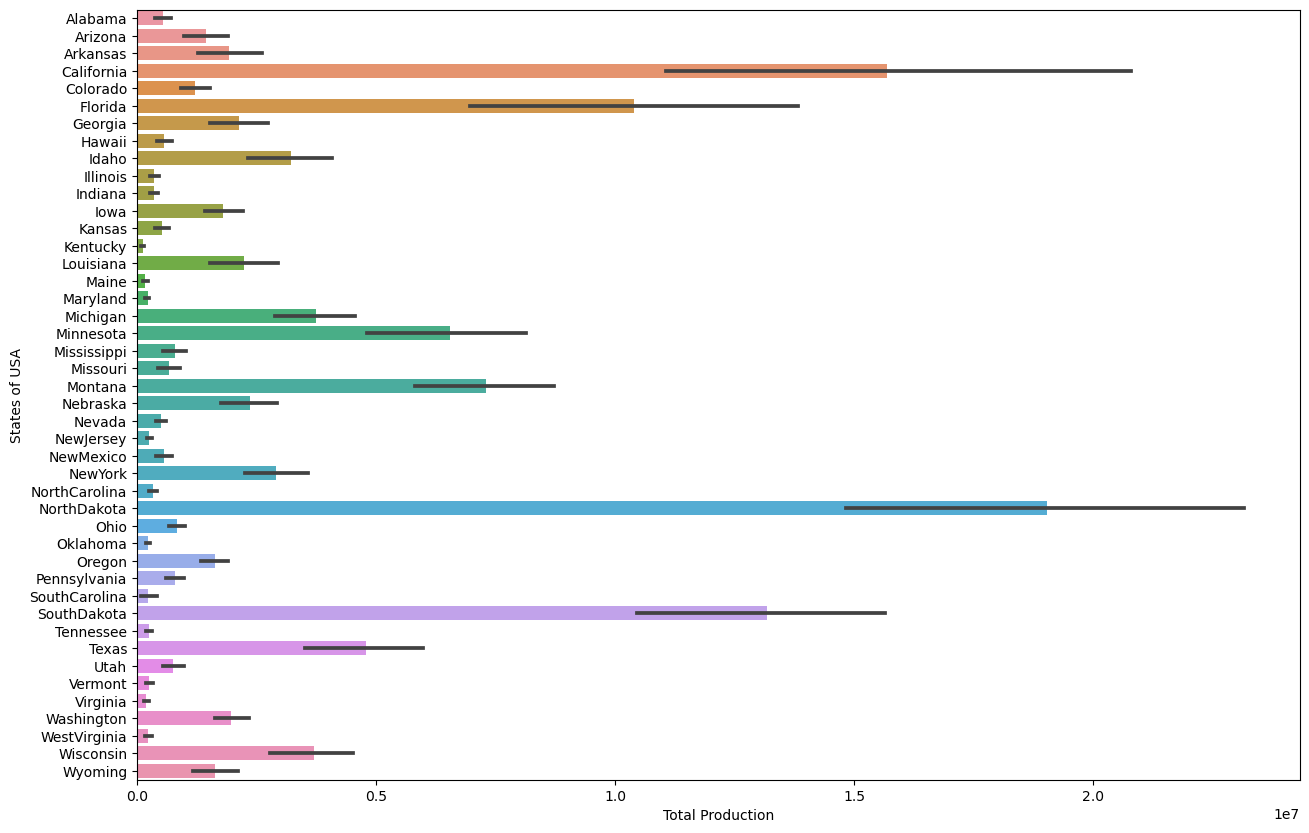

In [29]:
# to find out who are the top 5 honey producing states in USA


plt.figure(figsize = (15,10))
sns.barplot( x= df['production'], y= df['state'])
plt.xlabel('Total Production')
plt.ylabel('States of USA')
plt.show()

# Five States with Max production

1. North Dakota
2. California
3. South Dakota
4. Florida
5. Montana

In [30]:
# Year wise production


df1 = df.groupby('year').mean()

In [31]:
df1

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
year,,,,,,
1995,59977.272727,66.909091,4.778909e+06,9.575000e+05,74.840909,3.121000e+06
1996,58181.818182,70.068182,4.499886e+06,1.066455e+06,99.568182,4.085773e+06
1997,59651.162791,68.953488,4.445953e+06,1.601256e+06,91.325581,3.386000e+06
1998,60883.720930,69.953488,5.100488e+06,1.871488e+06,83.720930,3.395302e+06
1999,62186.046512,65.465116,4.757791e+06,1.839698e+06,80.325581,2.888070e+06
2000,60860.465116,67.534884,5.123721e+06,1.997395e+06,79.023256,3.047023e+06
2001,58139.534884,65.209302,4.311698e+06,1.501791e+06,88.465116,2.936302e+06
2002,57181.818182,67.272727,3.880273e+06,8.831591e+05,133.204545,5.016977e+06
2003,58681.818182,62.522727,4.107750e+06,9.220227e+05,151.068182,5.791659e+06


In [32]:
# setting up index

df1= df1.reset_index()
df1

,year,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
0,1995,59977.272727,66.909091,4.778909e+06,9.575000e+05,74.840909,3.121000e+06
1,1996,58181.818182,70.068182,4.499886e+06,1.066455e+06,99.568182,4.085773e+06
2,1997,59651.162791,68.953488,4.445953e+06,1.601256e+06,91.325581,3.386000e+06
3,1998,60883.720930,69.953488,5.100488e+06,1.871488e+06,83.720930,3.395302e+06
4,1999,62186.046512,65.465116,4.757791e+06,1.839698e+06,80.325581,2.888070e+06
5,2000,60860.465116,67.534884,5.123721e+06,1.997395e+06,79.023256,3.047023e+06
6,2001,58139.534884,65.209302,4.311698e+06,1.501791e+06,88.465116,2.936302e+06
7,2002,57181.818182,67.272727,3.880273e+06,8.831591e+05,133.204545,5.016977e+06
8,2003,58681.818182,62.522727,4.107750e+06,9.220227e+05,151.068182,5.791659e+06
9,2004,63325.000000,65.025000,4.559475e+06,1.523100e+06,132.350000,4.976100e+06


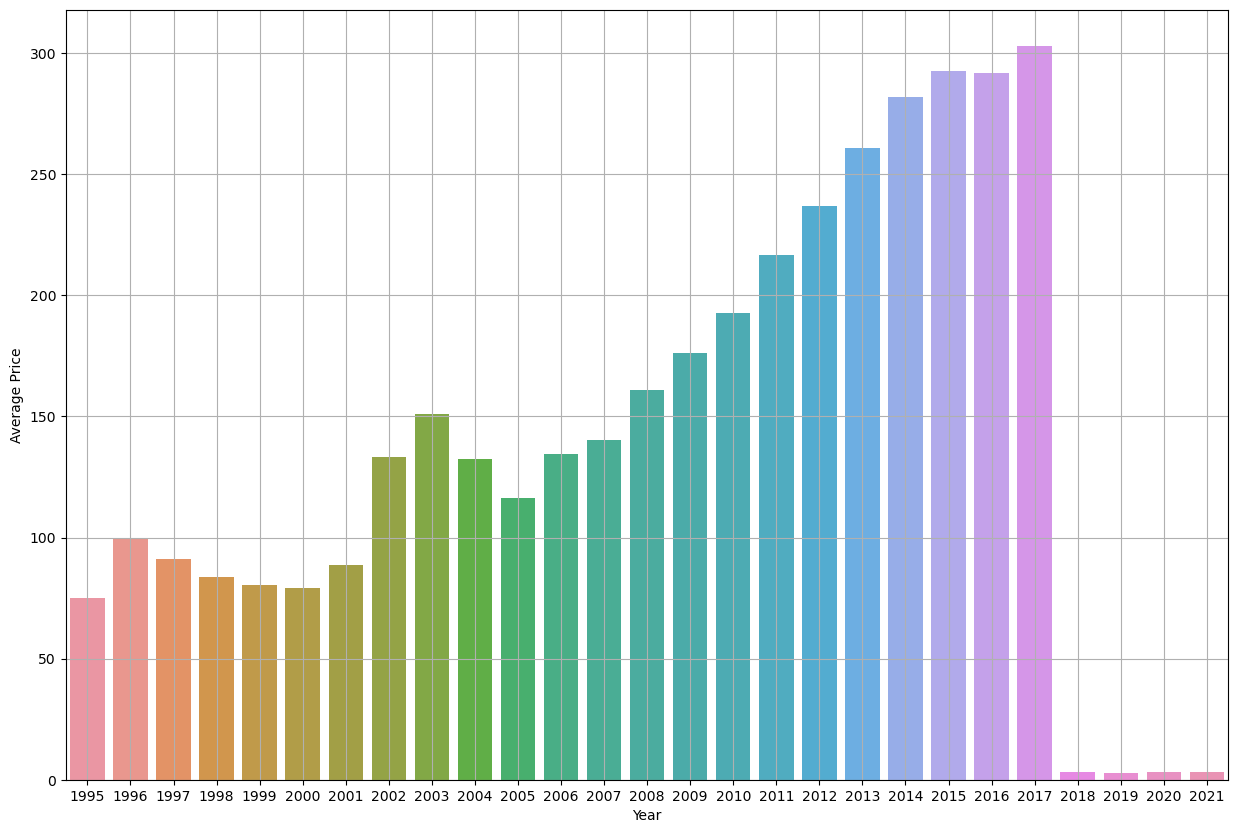

In [33]:
# maximum & minimum average pricing

plt.figure(figsize = (15,10))
sns.barplot(x= df1['year'], y= df1['average_price'])
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

# Insights

1. we had the highest avg pricing in the year 2017
2. In year 2018, we had the lowest avg pricing

In [34]:
# in which year we had the maxx production

df[df['production'] == df['production'].max()]

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
3,California,420000,93,39060000,4687000,60.0,23436000,1995


In [35]:
# the year in which max production was done

df['year'][df['production']== df['production'].max()]

3    1995
Name: year, dtype: category
Categories (27, int64): [1995, 1996, 1997, 1998, ..., 2018, 2019, 2020, 2021]

In [36]:
# minimum production in a year

df['year'][df['production']== df['production'].min()]

689    2011
Name: year, dtype: category
Categories (27, int64): [1995, 1996, 1997, 1998, ..., 2018, 2019, 2020, 2021]

In [37]:
# minimum production

df[df['production'] == df['production'].min()]

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
689,Kentucky,4000,39,12000,12000,317.0,495000,2011


#Inference

1. In the year 1995, the production was max
2. In the year 2011, the production was min

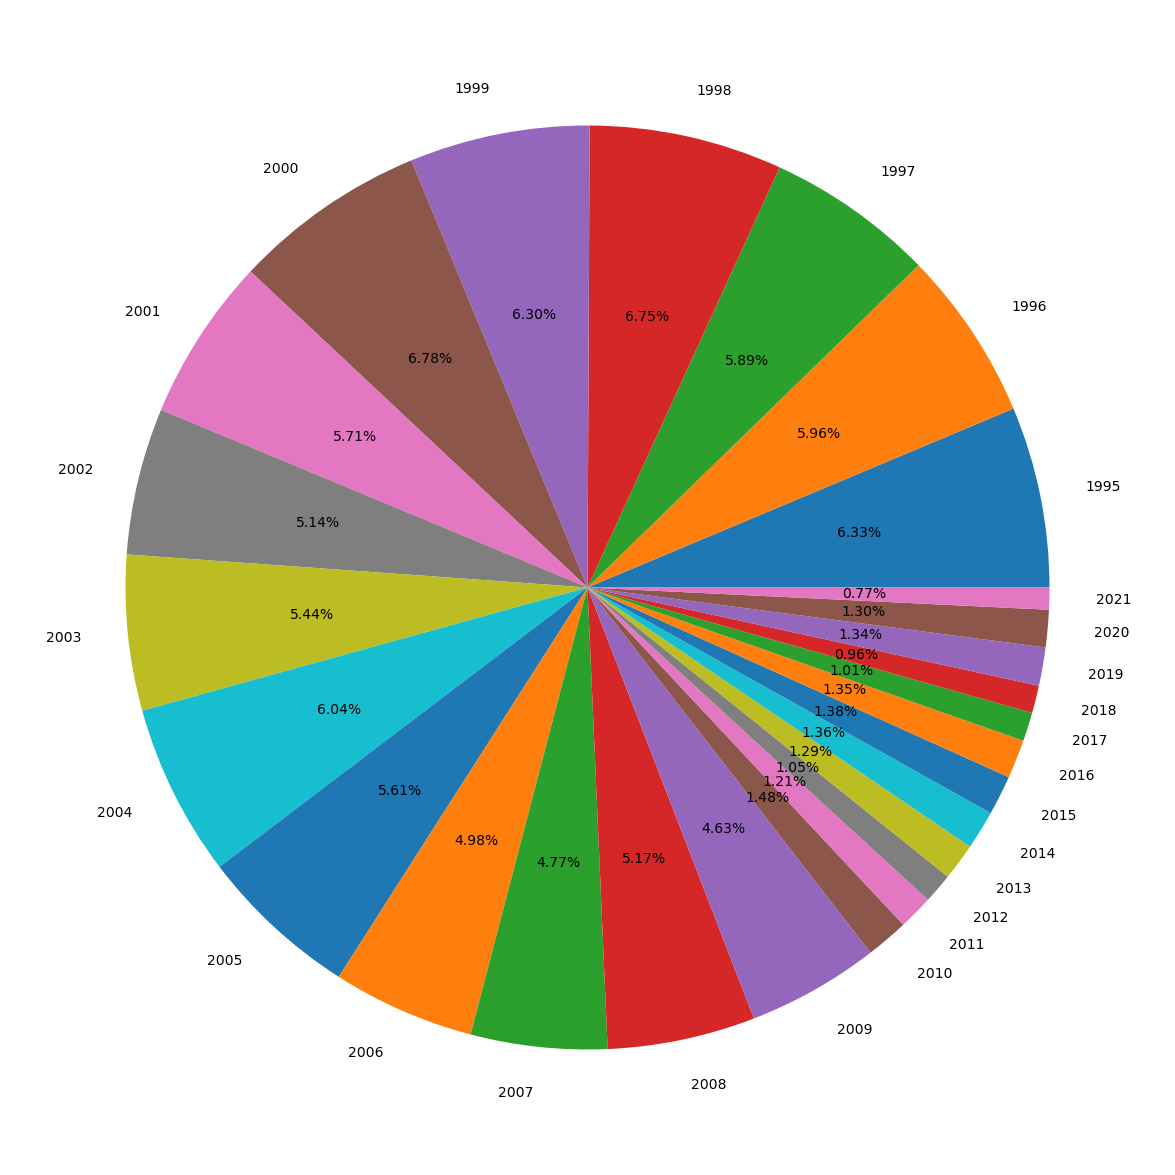

In [38]:
# Percentage of production that happened in all the year 1995-2021
# ( Piechart )

plt.figure(figsize=(15,15))
plt.pie(df1['production'],labels = df1['year'], autopct= "%1.2f%%")   # autopct(giving values) -> 1 decimal before . and 2 decimal after .
plt.show()



# Let us look at the overall trend of Honey Production in the US over the year

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015'),
  Text(21, 0, '2016'),
  Text(22, 0, '2017'),
  Text(23, 0, '2018'),
  Text(24, 0, '2019'),
  Text(25, 0, '2020'),
  Text(26, 0, '2021')])

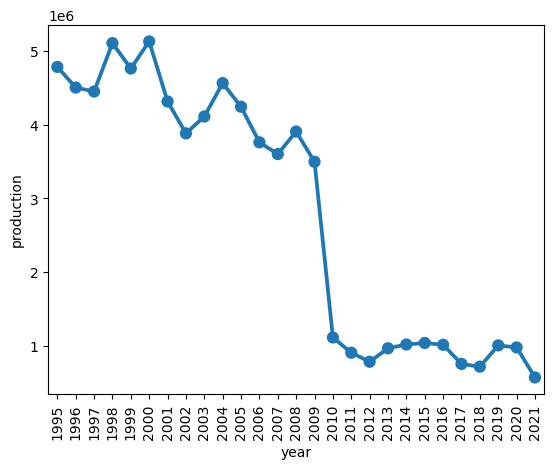

In [39]:
# Try to analyze the trend using the pointplot

sns.pointplot( x='year', y='production', data= df, ci= None) #ci= None means removing the lines
plt.xticks( rotation= 90)  # To rotate the axis label 90 Degree

# Analyze the trend with respect to the number of colonies with the years

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015'),
  Text(21, 0, '2016'),
  Text(22, 0, '2017'),
  Text(23, 0, '2018'),
  Text(24, 0, '2019'),
  Text(25, 0, '2020'),
  Text(26, 0, '2021')])

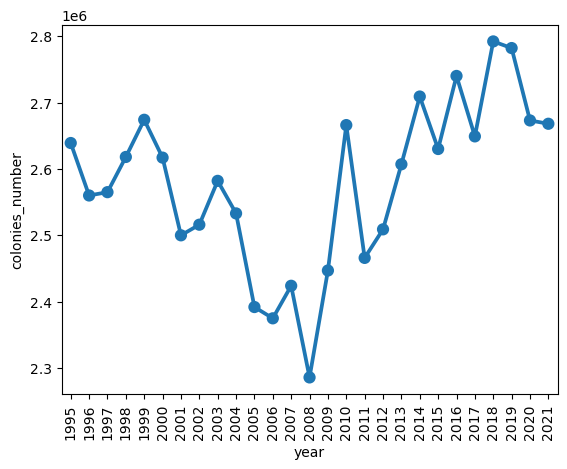

In [40]:
sns.pointplot( x='year', y='colonies_number', data= df, estimator= sum, ci= None) #ci= None means removing the lines
plt.xticks( rotation= 90)  # To rotate the axis label 90 Degree

*Observations:*

1. The number of colonies across the country shows a declining trend from 1998-2008 but has seen an uptick since 2008.

2. It is possible that there was some intervension in 2008 that help in increasing the number of honey bee colonies across the country.

# Variation of Yield per colony over the years

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015'),
  Text(21, 0, '2016'),
  Text(22, 0, '2017'),
  Text(23, 0, '2018'),
  Text(24, 0, '2019'),
  Text(25, 0, '2020'),
  Text(26, 0, '2021')])

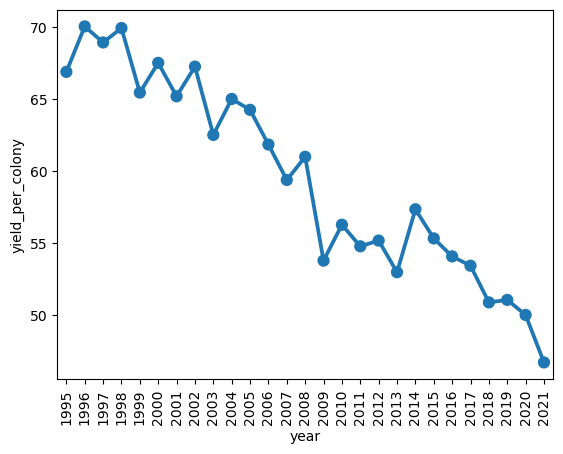

In [41]:
sns.pointplot( x='year', y='yield_per_colony', data= df,  ci= None) #ci= None means removing the lines
plt.xticks( rotation= 90)  # To rotate the axis label 90 Degree

*Observation*

* In contrast to number of colonies, the yield per colony has been decreasing since 1998.

* This indicates that, it is not the number of colonies that is causing a decline in totalhoney production but the yield per colony

# Graph on year and value_of_Production

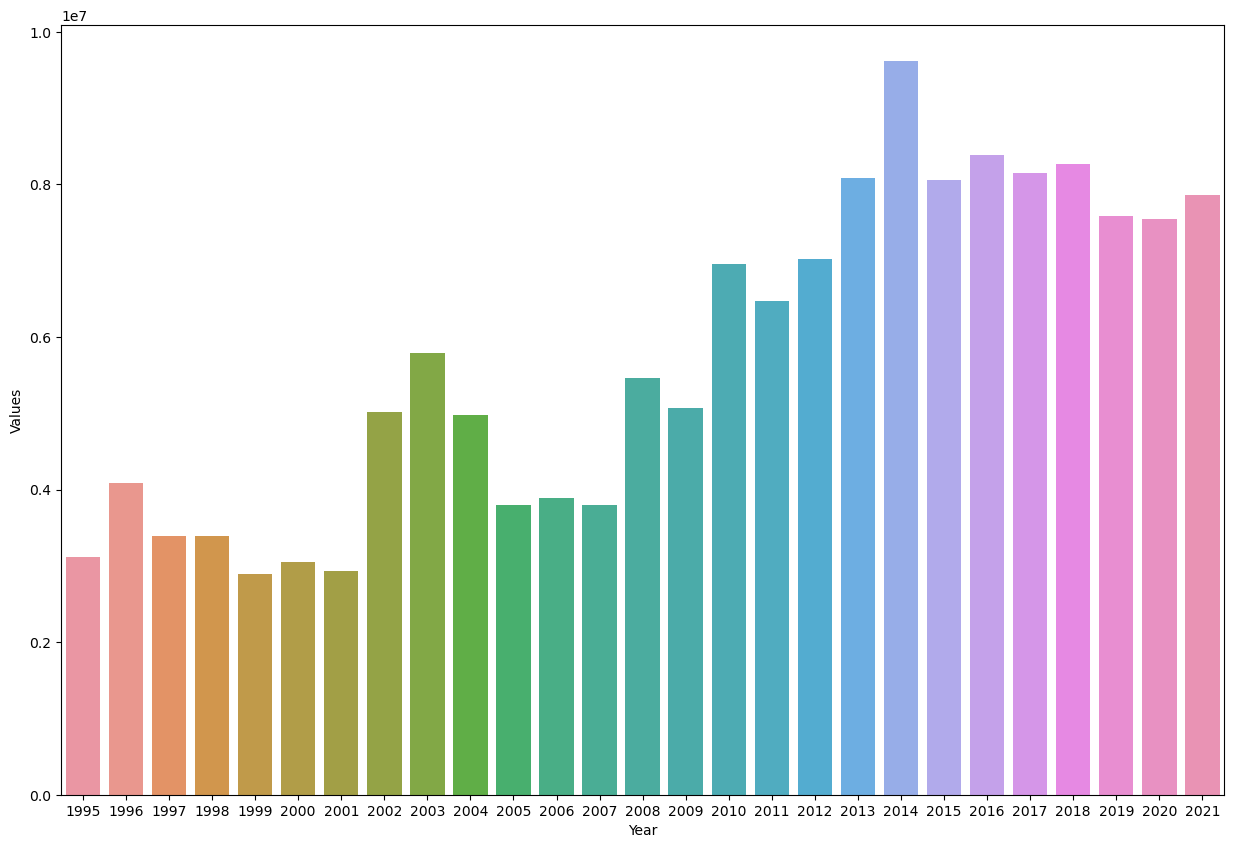

In [42]:
plt.figure(figsize=(15,10))
sns.barplot( x= df1['year'], y= df1['value_of_production'])
plt.xlabel('Year')
plt.ylabel('Values')
plt.show()